In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv('2021_OPM_FEVS_PRDF.csv')
df = df.dropna()

for k in range(2,69):
    if 'X' in df.iloc[:,k].values:
        df.iloc[:,k].replace({'X':int(df.iloc[:,k].mode())}, inplace=True)
        
df.iloc[:,2:69] = df.iloc[:,2:69].astype(int)
df = df.drop(["RandomID", "POSTWT"], axis=1)


FileNotFoundError: [Errno 2] No such file or directory: '2021_OPM_FEVS_PRDF.csv'

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df.drop(df.iloc[:, 45:58], inplace=True, axis=1)

In [5]:
df = df.drop(["Q54"], axis=1)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185696 entries, 2 to 292519
Data columns (total 63 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   agency    185696 non-null  object
 1   Q1        185696 non-null  int64 
 2   Q2        185696 non-null  int64 
 3   Q3        185696 non-null  int64 
 4   Q4        185696 non-null  int64 
 5   Q5        185696 non-null  int64 
 6   Q6        185696 non-null  int64 
 7   Q7        185696 non-null  int64 
 8   Q8        185696 non-null  int64 
 9   Q9        185696 non-null  int64 
 10  Q10       185696 non-null  int64 
 11  Q11       185696 non-null  int64 
 12  Q12       185696 non-null  int64 
 13  Q13       185696 non-null  int64 
 14  Q14       185696 non-null  int64 
 15  Q15       185696 non-null  int64 
 16  Q16       185696 non-null  int64 
 17  Q17       185696 non-null  int64 
 18  Q18       185696 non-null  int64 
 19  Q19       185696 non-null  int64 
 20  Q20       185696 non-null 

In [7]:
X = pd.get_dummies(df.drop(['agency','DLEAVING'],axis=1),drop_first=True)
# y = df['DLEAVING']
y = df["DLEAVING"].copy()
y.replace({'A':0, 'B':1, 'C':1, 'D':1}, inplace=True)

In [8]:
y.head()

2    1
3    0
5    0
6    0
7    1
Name: DLEAVING, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
model = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101)

In [12]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=101)

In [13]:
preds = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score,f1_score,cohen_kappa_score

In [15]:
confusion_matrix(y_test,preds)

array([[11170,  1323],
       [ 3287,  2790]])

In [16]:
f1_score(y_test, preds, average='weighted')

0.7368722368566865

In [17]:
f1_score(y_test, pd.DataFrame(np.ones((18570, 1))))

0.49312289528137304

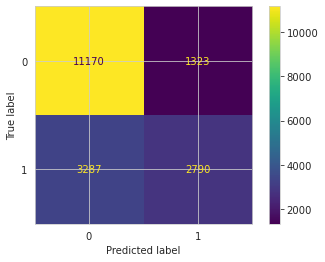

In [18]:
plot_confusion_matrix(model,X_test,y_test)

In [19]:
score_df = pd.DataFrame({'feature':X_train.columns,
                            'importance_score': model.feature_importances_})

score_df.sort_values('importance_score',ascending=False)

,feature,importance_score
41,Q42,0.077285
22,Q23,0.033384
5,Q6,0.032943
43,Q44,0.032567
2,Q3,0.028927
...,...,...
57,DDIS_B,0.007028
58,DAGEGRP_B,0.006625
56,DHISP_B,0.005269
55,DRNO_D,0.004222


In [20]:
# test_error = []

# for n in range(1,40):
#     # Use n random trees
#     model = RandomForestClassifier(n_estimators=n,max_features='auto')
#     model.fit(X_train,y_train)
#     test_preds = model.predict(X_test)
#     test_error.append(1-accuracy_score(test_preds,y_test))
 

In [21]:
# import matplotlib.pyplot as plt
# plt.plot(range(1,40),test_error,label='Test Error')
# plt.legend()

In [22]:
X = pd.get_dummies(df.drop(['DLEAVING'],axis=1),drop_first=True)
# y = df['DLEAVING']
y = df["DLEAVING"].copy()
y.replace({'A':0, 'B':1, 'C':1, 'D':1}, inplace=True)

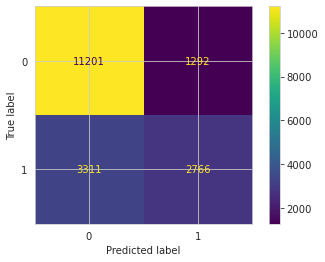

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model2 = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101)
model2.fit(X_train,y_train)
preds2 = model2.predict(X_test)
confusion_matrix(y_test,preds2)
f1_score(y_test, preds2, average='weighted')
plot_confusion_matrix(model2,X_test,y_test)

In [25]:
confusion_matrix(y_test,preds2)


array([[11201,  1292],
       [ 3311,  2766]])

In [26]:
f1_score(y_test, preds2, average='weighted')


0.7367036007420341